In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Audio
from IPython.core.display import display
from scipy.io import wavfile
import scipy

import librosa
from transformers import AutoProcessor, AutoModelForAudioClassification, Wav2Vec2FeatureExtractor

from pydub import AudioSegment
from pydub.utils import make_chunks


import sys
import os
import random

/var/folders/gp/1_dqbwsn08sbtf7s0k5q2lsc0000gn/T/ipykernel_9818/2881029697.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
/Users/daniel/opt/anaconda3/envs/is4242/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-02 21:58:14.816330: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
random.seed(0)

In [4]:
import importlib

# Helper Functions

In [4]:
def ensure_sample_rate(original_sample_rate, waveform,
                       desired_sample_rate=16000):
  """Resample waveform if required."""
  if original_sample_rate != desired_sample_rate:
    desired_length = int(round(float(len(waveform)) /
                               original_sample_rate * desired_sample_rate))
    waveform = scipy.signal.resample(waveform, desired_length)
  return desired_sample_rate, waveform

In [5]:
def load_wavfile(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [6]:
# We need to read the audio files as arrays
def speech_file_to_array_fn_batch(batch):
    speech_array, sampling_rate = librosa.load(batch["path"], sr=16_000)
    batch["speech"] = speech_array
    batch["sentence"] = batch["sentence"].upper()
    return batch

def speech_file_to_array_fn(filename):
    speech_array, sampling_rate = librosa.load(filename)
    if sampling_rate != 16_000:
        sampling_rate, speech_array= ensure_sample_rate(sampling_rate, speech_array)
    return speech_array

# Load Data

In [31]:
sample_rate = 16_000

In [32]:
wav_data = speech_file_to_array_fn("../../data/video3.mp4")

/var/folders/gp/1_dqbwsn08sbtf7s0k5q2lsc0000gn/T/ipykernel_10986/1835491012.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  speech_array, sampling_rate = librosa.load(filename)
/Users/daniel/opt/anaconda3/envs/is4242/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Sample rate: 16000 Hz
Total duration: 29.95s
Size of the input: 479237


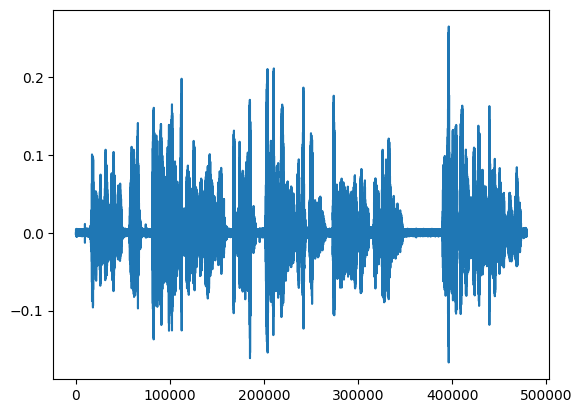

In [36]:
# Show some basic information about the audio.
duration = len(wav_data)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(wav_data)}')

# Visualise
plt.plot(wav_data)

In [35]:
# Listening to the wav file.
Audio(wav_data, rate=sample_rate)

In [3]:
# Load model directly
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor

In [ ]:

# processor = AutoProcessor.from_pretrained("r-f/wav2vec-english-speech-emotion-recognition")
# model = Wav2Vec2ForSpeechClassification.from_pretrained("r-f/wav2vec-english-speech-emotion-recognition")

In [4]:
model1 = AutoModelForAudioClassification.from_pretrained("ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-large-xlsr-53")

id2label = {
        0: "angry",
        1: "calm",
        2: "disgust",
        3: "fearful",
        4: "happy",
        5: "neutral",
        6: "sad",
        7: "surprised"
    }

label2id = {y:x for x, y in id2label.items()}

# UPLOAD_DIR = os.path.abspath("uploads")

/Users/daniel/opt/anaconda3/envs/is4242/lib/python3.9/site-packages/transformers/configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.output.bias', 'classifier.output.weight', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model f

# Speech Emotion Prediction

## Load Model

In [4]:
sys.path.append("../../")

# import analyse_sound

from app.src import speech_emotion

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at r-f/wav2vec-english-speech-emotion-recognition and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
importlib.reload(speech_emotion)

<module 'app.src.speech_emotion' from '/Users/daniel/Documents/GitHub/moodify/notebooks/speech_emotion/../../app/src/speech_emotion/__init__.py'>

In [5]:
data_dir = os.path.join("../../", "data")
video_dir = os.path.join(data_dir, "sample_videos")
filename = "video4.mp4"

path = os.path.join(video_dir, filename)
path

'../../data/sample_videos/video4.mp4'

In [6]:
dir(speech_emotion)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'analyse_audio',
 'analyse_audio_filename',
 'analyse_audio_path',
 'id2label',
 'label2id',
 'predict_emotion',
 'speech_emotion']

In [7]:
preds, interps = speech_emotion.analyse_audio_path(path)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [8]:
preds

[1, 4, 1, 6, 1, 1, 1, 4, 1, 1, 6]

In [11]:
interps

[{'angry': 0.0504,
  'calm': -0.0613,
  'disgust': -0.0135,
  'fearful': -0.0605,
  'happy': -0.0952,
  'neutral': 0.0143,
  'sad': -0.0071},
 {'angry': -0.0286,
  'calm': 0.0188,
  'disgust': -0.0045,
  'fearful': -0.0593,
  'happy': 0.014,
  'neutral': -0.1021,
  'sad': -0.0567},
 {'angry': 0.0667,
  'calm': -0.0637,
  'disgust': -0.0073,
  'fearful': -0.0588,
  'happy': -0.1198,
  'neutral': 0.0281,
  'sad': -0.0359},
 {'angry': -0.0394,
  'calm': 0.0052,
  'disgust': 0.0758,
  'fearful': -0.0387,
  'happy': -0.08,
  'neutral': -0.0006,
  'sad': -0.0163},
 {'angry': 0.0372,
  'calm': -0.0402,
  'disgust': 0.0004,
  'fearful': -0.0585,
  'happy': -0.1093,
  'neutral': -0.0112,
  'sad': -0.0229},
 {'angry': 0.0195,
  'calm': -0.0371,
  'disgust': 0.0133,
  'fearful': -0.0565,
  'happy': -0.1125,
  'neutral': 0.0071,
  'sad': -0.0215},
 {'angry': 0.0282,
  'calm': -0.0398,
  'disgust': 0.0184,
  'fearful': -0.0544,
  'happy': -0.1155,
  'neutral': 0.0104,
  'sad': -0.0343},
 {'angry': 

In [12]:
speech_emotion.id2label

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fearful',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprised'}

In [12]:
speech_emotion.label2id

{'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fearful': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprised': 7}

# Speech to TextPrediction

## Load Model

In [4]:
from transformers import Speech2TextProcessor, Speech2TextForConditionalGeneration

In [5]:
sys.path.append("../../")

# import analyse_sound

from app.src.speech_to_text import speech_to_text_model

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

In [23]:
importlib.reload(speech_to_text)

<module 'app.src.speech_to_text.speech_to_text' from '/Users/daniel/Documents/GitHub/moodify/notebooks/speech_emotion/../../app/src/speech_to_text/speech_to_text.py'>

In [6]:
data_dir = os.path.join("../../", "data")
video_dir = os.path.join(data_dir, "sample_videos")
filename = "video4.mp4"

path = os.path.join(video_dir, filename)
path

'../../data/sample_videos/video4.mp4'

In [7]:
text = speech_to_text_model.analyse("test",path)

/Users/daniel/Documents/GitHub/moodify/notebooks/speech_emotion/../../app/src/speech_to_text/speech_to_text.py:33: UserWarning: PySoundFile failed. Trying audioread instead.
  speech_array, sampling_rate = librosa.load(filename)
/Users/daniel/opt/anaconda3/envs/is4242/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/daniel/Documents/GitHub/moodify/notebooks/speech_emotion/uploads/test/text/text.txt'

In [8]:
audio = speech_to_text_model.speech_file_to_array_fn(path)

/Users/daniel/Documents/GitHub/moodify/notebooks/speech_emotion/../../app/src/speech_to_text/speech_to_text.py:33: UserWarning: PySoundFile failed. Trying audioread instead.
  speech_array, sampling_rate = librosa.load(filename)
/Users/daniel/opt/anaconda3/envs/is4242/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [9]:
text = speech_to_text_model.model(audio)

In [14]:
text['text'].capitalize()

"So it's two weeks from pram and you don't have a date what are you going to do or maybe you have a job interview for that dream job and you really want to win the employer over"

In [10]:
audio = speech_to_text_model.read_file(path)



In [11]:
x = np.array(audio.get_array_of_samples())

In [17]:
x = x.astype(np.double)

In [18]:
speech_to_text.speech_to_text_model.model(x)

{'text': 'U CO AL A L O   AAL         OS UU  O'}

In [13]:
x = speech_to_text.speech_to_text_model.speech_file_to_array_fn(path)

/Users/daniel/Documents/GitHub/moodify/notebooks/speech_emotion/../../app/src/speech_to_text/speech_to_text.py:33: UserWarning: PySoundFile failed. Trying audioread instead.
  speech_array, sampling_rate = librosa.load(filename)
/Users/daniel/opt/anaconda3/envs/is4242/lib/python3.9/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [14]:
x

array([-0.0016001 , -0.00080066, -0.00134219, ..., -0.00398532,
       -0.00388385, -0.00255183], dtype=float32)

In [15]:
speech_to_text.speech_to_text_model.model(x)

{'text': "SO IT'S TWO WEEKS FROM PRAM AND YOU DON'T HAVE A DATE WHAT ARE YOU GOING TO DO OR MAYBE YOU HAVE A JOB INTERVIEW FOR THAT DREAM JOB AND YOU REALLY WANT TO WIN THE EMPLOYER OVER"}

In [5]:
model = Speech2TextForConditionalGeneration.from_pretrained("facebook/s2t-small-librispeech-asr")
processor = Speech2TextProcessor.from_pretrained("facebook/s2t-small-librispeech-asr")

Some weights of Speech2TextForConditionalGeneration were not initialized from the model checkpoint at facebook/s2t-small-librispeech-asr and are newly initialized: ['model.decoder.embed_positions.weights', 'model.encoder.embed_positions.weights']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
processor

44100

In [ ]:
dir(speech_emotion)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'analyse_audio',
 'analyse_audio_filename',
 'analyse_audio_path',
 'id2label',
 'label2id',
 'predict_emotion',
 'speech_emotion']

In [ ]:
preds, interps = speech_emotion.analyse_audio_path(path)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [ ]:
preds

[1, 4, 1, 6, 1, 1, 1, 4, 1, 1, 6]

In [ ]:
interps

[{'angry': 0.0504,
  'calm': -0.0613,
  'disgust': -0.0135,
  'fearful': -0.0605,
  'happy': -0.0952,
  'neutral': 0.0143,
  'sad': -0.0071},
 {'angry': -0.0286,
  'calm': 0.0188,
  'disgust': -0.0045,
  'fearful': -0.0593,
  'happy': 0.014,
  'neutral': -0.1021,
  'sad': -0.0567},
 {'angry': 0.0667,
  'calm': -0.0637,
  'disgust': -0.0073,
  'fearful': -0.0588,
  'happy': -0.1198,
  'neutral': 0.0281,
  'sad': -0.0359},
 {'angry': -0.0394,
  'calm': 0.0052,
  'disgust': 0.0758,
  'fearful': -0.0387,
  'happy': -0.08,
  'neutral': -0.0006,
  'sad': -0.0163},
 {'angry': 0.0372,
  'calm': -0.0402,
  'disgust': 0.0004,
  'fearful': -0.0585,
  'happy': -0.1093,
  'neutral': -0.0112,
  'sad': -0.0229},
 {'angry': 0.0195,
  'calm': -0.0371,
  'disgust': 0.0133,
  'fearful': -0.0565,
  'happy': -0.1125,
  'neutral': 0.0071,
  'sad': -0.0215},
 {'angry': 0.0282,
  'calm': -0.0398,
  'disgust': 0.0184,
  'fearful': -0.0544,
  'happy': -0.1155,
  'neutral': 0.0104,
  'sad': -0.0343},
 {'angry': 

In [ ]:
speech_emotion.id2label

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fearful',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprised'}

In [ ]:
speech_emotion.label2id

{'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fearful': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprised': 7}